## ICR - Identifying Age-Related Conditions¶


Use Machine Learning to detect conditions with measurements of anonymous characteristics
https://www.kaggle.com/code/samuelabatnehendalie/icr-identifying-age-related-conditions

### Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [29]:
''' use this code when upload to kaggle
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


train = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
test = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
'''

' use this code when upload to kaggle\n# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here\'s several helpful packages to load\n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"\n# You can also write temporary files to /kaggle/temp/, but they wo

In [30]:
directory = "data"


In [31]:
train = pd.read_csv(os.path.join(directory, "train.csv"))
meta_data = pd.read_csv(os.path.join(directory, "greeks.csv"))
test = pd.read_csv(os.path.join(directory, "test.csv"))

### Exploratory Data Analysis

In [32]:
train.head() # a lot of columns!

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [33]:
train.describe() # may be coming from different distribution


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [34]:
train.info() # can see that there are several null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [35]:
null_cols = train.columns[train.isnull().any()]
print(train[null_cols].isnull().sum()) # remove BQ and EL since they have more 50 null values

BQ    60
CB     2
CC     3
DU     1
EL    60
FC     1
FL     1
FS     2
GL     1
dtype: int64


In [36]:
train = train.drop(['BQ', 'EL'], axis=1)



In [37]:
null_cols = train.columns[train.isnull().any()]
for col in null_cols:
    train[col].fillna(train[col].mean(), inplace=True)


In [38]:
train.info() # no more null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 56 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      617 non-null    float64
 16  CC      617 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

In [39]:
ytrain = train['Class']
print(ytrain)
train = train.drop(['Class', 'Id'], axis=1)
train.head()

0      1
1      0
2      0
3      0
4      1
      ..
612    0
613    0
614    0
615    0
616    0
Name: Class, Length: 617, dtype: int64


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614


In [40]:
train['EJ'].unique()

array(['B', 'A'], dtype=object)

In [41]:
# make categorical data into numerical data
train = pd.get_dummies(train)
train.head()


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FR,FS,GB,GE,GF,GH,GI,GL,EJ_A,EJ_B
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,0,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,1,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0,1
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0,1
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,0,1


### Train Test Split

In [42]:
# train test split such that same distribution of classes in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, ytrain, test_size=0.2, random_state=42, stratify=ytrain)

### Perform Variable Selection Methods

[0.59745861 0.83001421 0.95737439 0.98255972 0.98990672 0.99572479
 0.99939251 0.99958906 0.99976719 0.99982681 0.99987752 0.99990927
 0.9999335  0.99995185 0.99996472 0.99997391 0.99998065 0.99998623
 0.99999039 0.99999319 0.99999498 0.99999624 0.99999733 0.99999793
 0.99999846 0.99999881 0.99999904 0.99999924 0.99999941 0.99999954
 0.99999965 0.99999975 0.99999983 0.99999988 0.99999991 0.99999993
 0.99999995 0.99999997 0.99999998 0.99999999 0.99999999 0.99999999
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


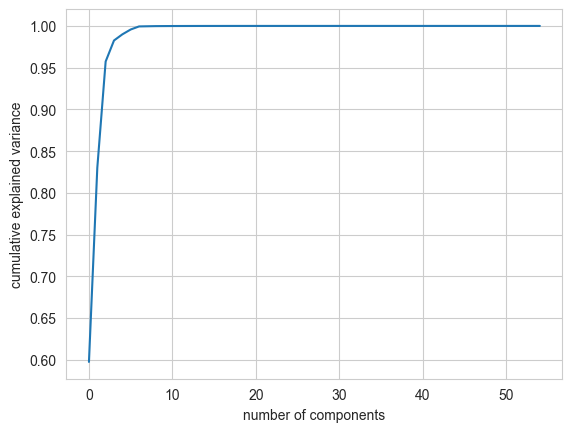

In [43]:
# pca
from sklearn.decomposition import PCA

# determine the number of components
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
print(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show() # 3 principal components is enough


In [44]:
pca = PCA(n_components=3)
pca.fit(X_train)
train_pca = pca.transform(X_train)
print(train_pca.shape)

In [45]:
# fit a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(train_pca, y_train)
y_pred = logreg.predict(train_pca)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

test_pca = pca.transform(X_test)
y_pred = logreg.predict(test_pca)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


(493, 3)


In [46]:
# fit a svm model
from sklearn.svm import SVC

svm = SVC()
svm.fit(train_pca, y_train)
y_pred = svm.predict(train_pca)
print('Accuracy of SVM classifier on train set: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = svm.predict(test_pca)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy of logistic regression classifier on train set: 0.83
[[405   2]
 [ 81   5]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       407
           1       0.71      0.06      0.11        86

    accuracy                           0.83       493
   macro avg       0.77      0.53      0.51       493
weighted avg       0.81      0.83      0.77       493

Accuracy of logistic regression classifier on test set: 0.85
[[102   0]
 [ 19   3]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       102
           1       1.00      0.14      0.24        22

    accuracy                           0.85       124
   macro avg       0.92      0.57      0.58       124
weighted avg       0.87      0.85      0.80       124

(124, 2)
(124,) (124,) (124,)
0.9184709559648208


In [47]:
# fit a MLP
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(train_pca, y_train)
y_pred = mlp.predict(train_pca)
print('Accuracy of MLP classifier on train set: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = mlp.predict(test_pca)
print('Accuracy of MLP classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy of SVM classifier on train set: 0.84
[[403   4]
 [ 76  10]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       407
           1       0.71      0.12      0.20        86

    accuracy                           0.84       493
   macro avg       0.78      0.55      0.55       493
weighted avg       0.82      0.84      0.79       493

Accuracy of SVM classifier on test set: 0.85
[[102   0]
 [ 18   4]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       102
           1       1.00      0.18      0.31        22

    accuracy                           0.85       124
   macro avg       0.93      0.59      0.61       124
weighted avg       0.88      0.85      0.81       124

(124, 2)
(124,) (124,) (124,)
0.8667276399605366


### Test data

In [48]:
test = pd.read_csv(os.path.join(directory, "test.csv"))
test.head()


In [49]:
# remove BQ and EL since they have more 50 null values
test = test.drop(['BQ', 'EL'], axis=1)

# fill null values with mean
null_cols = test.columns[test.isnull().any()]
for col in null_cols:
    test[col].fillna(test[col].mean(), inplace=True)

# drop Id column
test_id = test['Id']
test = test.drop(['Id'], axis=1)

# make categorical data into numerical data
test = pd.get_dummies(test)
# add a new column to test data

test['EJ_B'] = 0 # delete this line when upload to kaggle
test.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# fit the test data
test_pca = pca.transform(test)
y_prob = logreg.predict_proba(test_pca)

y_prob[:,1]


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FR,FS,GB,GE,GF,GH,GI,GL,EJ_A,EJ_B
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


array([0.17221937, 0.17221937, 0.17221937, 0.17221937, 0.17221937])

In [51]:
out = pd.DataFrame(
    {
        "Id": test_id,
        "class_0": y_prob[:,0],
        "class_1": y_prob[:,1],
    }
)

In [52]:
out

In [53]:
out.to_csv(r"submission.csv", index=False)


,Id,class_0,class_1
0,00eed32682bb,0.827781,0.172219
1,010ebe33f668,0.827781,0.172219
2,02fa521e1838,0.827781,0.172219
3,040e15f562a2,0.827781,0.172219
4,046e85c7cc7f,0.827781,0.172219
